In [1]:
import os
import rasterio as rio
from rasterio.plot import show

In [2]:
dim = 224

In [3]:
os.makedirs('./data/hed/x', exist_ok=True)
os.makedirs('./data/hed/y', exist_ok=True)

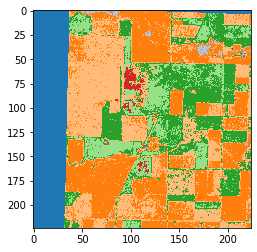

In [8]:
img = rio.open('./data/six_bands/2017.10.15.tif')
d = img.read()
show(d[2, 0:224, 0:224], cmap='tab20')

In [5]:
def generate(in_dir, filename, out_dir, dim):
    in_path = in_dir + '/' + filename
    img = rio.open(in_path)
    profile = img.profile
    profile['width'] = dim
    profile['height'] = dim
    
    data = img.read()
    count = 0
    for i in range(0, data.shape[1]-dim, dim):
        for j in range(0, data.shape[2]-dim, dim):
            out = out_dir + '/' + filename[0:filename.rfind('.')] + '_' + str(count) + '.tif'
            with rio.open(out, 'w', **profile) as dst:
               dst.write(data[:, i:i+dim, j:j+dim])
            count += 1

In [6]:
# generate x
for f in os.listdir('./data/six_bands'):
    generate('./data/six_bands', f, './data/hed/x', dim)

# generate y
generate('./data', 'truth.tif', './data/hed/y', dim)